<a href="https://colab.research.google.com/github/Anil1331/Unet-Camvid/blob/master/Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')
!cp CamVid.zip /content/drive/'My Drive'/
!cp /content/drive/'My Drive'/CamVid.zip .
!unzip -qq CamVid.zip

In [0]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *

IMG_SIZE = 512

def unet(pretrained_weights=None, input_size=(IMG_SIZE, IMG_SIZE, 3),num_class=2):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5))

    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(num_class, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    if num_class == 2:
        conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)
        loss_function = 'binary_crossentropy'
    else:
        conv10 = Conv2D(num_class, 1, activation='softmax')(conv9)
        loss_function = 'categorical_crossentropy'
    model = Model(input=inputs, output=conv10)

    model.compile(optimizer=Adam(lr=1e-4), loss=loss_function, metrics=["accuracy"])
    model.summary()

    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    return model

In [4]:
model = unet()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_26[0][0]                  
__________________________________________________________________________________________________
conv2d_27 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [5]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.91 MiB | 54.36 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [0]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os
import skimage.io as io
import skimage.transform as trans
import cv2
import warnings

warnings.filterwarnings("ignore")

BackGround = [255, 255, 255]
road = [0, 0, 0]
# COLOR_DICT = np.array([BackGround, road])
one = [128, 128, 128]
two = [128, 0, 0]
three = [192, 192, 128]
four = [255, 69, 0]
five = [128, 64, 128]
six = [60, 40, 222]
seven = [128, 128, 0]
eight = [192, 128, 128]
nine = [64, 64, 128]
ten = [64, 0, 128]
eleven = [64, 64, 0]
twelve = [0, 128, 192]
COLOR_DICT = np.array([one, two,three,four,five,six,seven,eight,nine,ten,eleven,twelve])


class data_preprocess:
    def __init__(self, train_path=None, image_folder=None, label_folder=None,
                 valid_path=None,valid_image_folder =None,valid_label_folder = None,
                 test_path=None, save_path=None,
                 img_rows=512, img_cols=512,
                 flag_multi_class=False,
                 num_classes = 2):
        self.img_rows = img_rows
        self.img_cols = img_cols
        self.train_path = train_path
        self.image_folder = image_folder
        self.label_folder = label_folder
        self.valid_path = valid_path
        self.valid_image_folder = valid_image_folder
        self.valid_label_folder = valid_label_folder
        self.test_path = test_path
        self.save_path = save_path
        self.data_gen_args = dict(rotation_range=0.2,
                                  width_shift_range=0.05,
                                  height_shift_range=0.05,
                                  shear_range=0.05,
                                  zoom_range=0.05,
                                  vertical_flip=True,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
        self.image_color_mode = "rgb"
        self.label_color_mode = "rgb"

        self.flag_multi_class = flag_multi_class
        self.num_class = num_classes
        self.target_size = (512, 512)
        self.img_type = 'png'

    def adjustData(self, img, label):
        if (self.flag_multi_class):
            img = img / 255.
            label = label[:, :, :, 0] if (len(label.shape) == 4) else label[:, :, 0]
            new_label = np.zeros(label.shape + (self.num_class,))
            for i in range(self.num_class):
                new_label[label == i, i] = 1
            label = new_label
        elif (np.max(img) > 1):
            img = img / 255.
            label = label / 255.
            label[label > 0.5] = 1
            label[label <= 0.5] = 0
        return (img, label)

    def trainGenerator(self, batch_size, image_save_prefix="image", label_save_prefix="label",
                       save_to_dir=None, seed=7):
        '''
        can generate image and label at the same time
        use the same seed for image_datagen and label_datagen to ensure the transformation for image and label is the same
        if you want to visualize the results of generator, set save_to_dir = "your path"
        '''
        image_datagen = ImageDataGenerator(**self.data_gen_args)
        label_datagen = ImageDataGenerator(**self.data_gen_args)
        image_generator = image_datagen.flow_from_directory(
            self.train_path,
            classes=[self.image_folder],
            class_mode=None,
            color_mode=self.image_color_mode,
            target_size=self.target_size,
            batch_size=batch_size,
            save_to_dir=save_to_dir,
            save_prefix=image_save_prefix,
            seed=seed)
        label_generator = label_datagen.flow_from_directory(
            self.train_path,
            classes=[self.label_folder],
            class_mode=None,
            color_mode=self.label_color_mode,
            target_size=self.target_size,
            batch_size=batch_size,
            save_to_dir=save_to_dir,
            save_prefix=label_save_prefix,
            seed=seed)
        train_generator = zip(image_generator, label_generator)
        for (img, label) in train_generator:
            img, label = self.adjustData(img, label)
            yield (img, label)

    def testGenerator(self):
        filenames = os.listdir(self.test_path)
        for filename in filenames:
            img = io.imread(os.path.join(self.test_path, filename), as_gray=False)
            img = img / 255.
            img = trans.resize(img, self.target_size, mode='constant')
            img = np.reshape(img, img.shape + (1,)) if (not self.flag_multi_class) else img
            img = np.reshape(img, (1,) + img.shape)
            yield img

    def validLoad(self, batch_size,seed=7):
        image_datagen = ImageDataGenerator(**self.data_gen_args)
        label_datagen = ImageDataGenerator(**self.data_gen_args)
        image_generator = image_datagen.flow_from_directory(
            self.valid_path,
            classes=[self.valid_image_folder],
            class_mode=None,
            color_mode=self.image_color_mode,
            target_size=self.target_size,
            batch_size=batch_size,
            seed=seed)
        label_generator = label_datagen.flow_from_directory(
            self.valid_path,
            classes=[self.valid_label_folder],
            class_mode=None,
            color_mode=self.label_color_mode,
            target_size=self.target_size,
            batch_size=batch_size,
            seed=seed)
        train_generator = zip(image_generator, label_generator)
        for (img, label) in train_generator:
            img, label = self.adjustData(img, label)
            yield (img, label)
        # return imgs,labels

    def saveResult(self, npyfile, size, name,threshold=127):
        for i, item in enumerate(npyfile):
            img = item
            img_std = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
            if self.flag_multi_class:
                for row in range(len(img)):
                    for col in range(len(img[row])):
                        num = np.argmax(img[row][col])
                        img_std[row][col] = COLOR_DICT[num]
            else:
                for k in range(len(img)):
                    for j in range(len(img[k])):
                        num = img[k][j]
                        if num < (threshold/255.0):
                            img_std[k][j] = road
                        else:
                            img_std[k][j] = BackGround
            img_std = cv2.resize(img_std, size, interpolation=cv2.INTER_CUBIC)
            cv2.imwrite(os.path.join(self.save_path, ("%s_predict." + self.img_type) % (name)), img_std)

mkdir: cannot create directory ‘log’: File exists
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_169 (Conv2D)             (None, 512, 512, 64) 1792        input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_170 (Conv2D)             (None, 512, 512, 64) 36928       conv2d_169[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_29 (MaxPooling2D) (None, 256, 256, 64) 0           conv2d_170[0][0]                 
___________________________________________________________

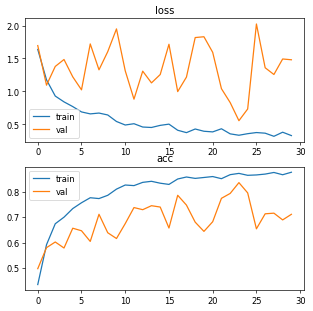

In [61]:
import os
import keras
from keras.callbacks import TensorBoard
import tensorflow as tf
import keras.backend.tensorflow_backend as K
import matplotlib.pyplot as plt
!mkdir model
!mkdir log
train_path = "CamVid"
image_folder = "train"
label_folder = "trainannot"
valid_path =  "CamVid"
valid_image_folder ="val"
valid_label_folder = "valannot"
log_filepath = './log'
flag_multi_class = True
num_classes = 12
dp = data_preprocess(train_path=train_path,image_folder=image_folder,label_folder=label_folder,
                     valid_path=valid_path,valid_image_folder=valid_image_folder,valid_label_folder=valid_label_folder,
                     flag_multi_class=flag_multi_class,
                     num_classes=num_classes)

# train your own model
train_data = dp.trainGenerator(batch_size=2)
valid_data = dp.validLoad(batch_size=2)
test_data = dp.testGenerator()
model = unet(num_class=num_classes)

tb_cb = TensorBoard(log_dir=log_filepath)
model_checkpoint = keras.callbacks.ModelCheckpoint('./model/CamVid_model_v1.hdf5', monitor='val_loss',verbose=1,save_best_only=True)
history = model.fit_generator(train_data,
                              steps_per_epoch=200,epochs=30,
                              validation_steps=10,
                              validation_data=valid_data,
                              callbacks=[model_checkpoint,tb_cb])

# draw the loss and accuracy curve
plt.figure(12, figsize=(6, 6), dpi=60)
plt.subplot(211)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('loss')
plt.legend()

plt.subplot(212)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('acc')
plt.legend()

plt.show()